Парная линейная регрессия

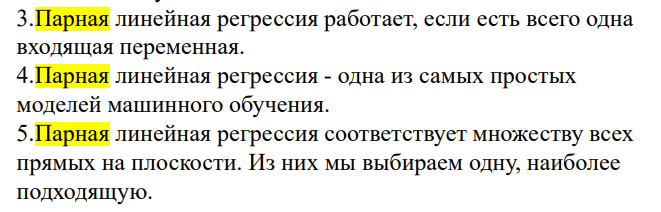

Цель работы
    Познакомиться с моделью парной линейной регрессии регрессии и методом градиентного спуска.

Содержание работы
Найти оценки параметров модели парной линейной регрессии прямыми вычислениями и палучить с помощью модели прогнозы результативного прознака.
Найти оценки параметров модели парной линейной регрессии с использованием метода градиентного спуска.
Оценить качество построенной модели, сравнив на графике обучающую выборку и прогнозы.
Построить кривые обучения.

In [132]:
#Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
#Исходные данные: x - расходы на рекламу, Y - объемы продаж
x = np.array([3, 5, 7, 6, 9])
Y = np.array([3, 7, 11, 14, 15])
display(x, Y)

array([3, 5, 7, 6, 9])

array([ 3,  7, 11, 14, 15])

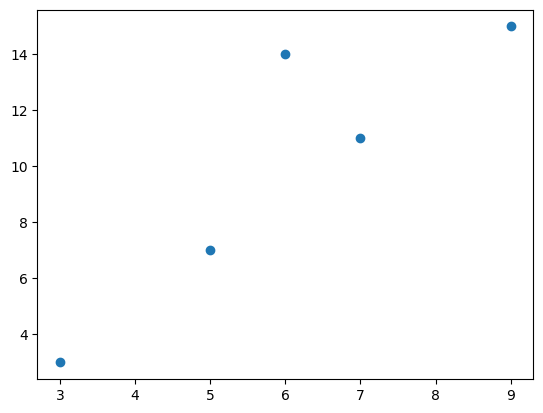

In [134]:
#Изобразим их на графике
plt.figure()
plt.scatter(x, Y)
plt.show()

In [135]:
#Вычислим оценки коэффициентов парной линейной регрессии по формулам
a1 = ((x - x.mean())*(Y - Y.mean())).mean()/((x - x.mean())**2).mean()
a0 = Y.mean() - a1*x.mean()
print("Модель линейной регрессии: Y^ = ", a0, " + ", a1, "* x")

Модель линейной регрессии: Y^ =  -2.0  +  2.0 * x


In [136]:
#Дадим серию прогнозов Y^ для x от 3 до 9 с шагом 1
x_space = np.linspace(3, 9, 7)
print(x_space)
Y_pred = a0 + a1*x_space
print(Y_pred)

[3. 4. 5. 6. 7. 8. 9.]
[ 4.  6.  8. 10. 12. 14. 16.]


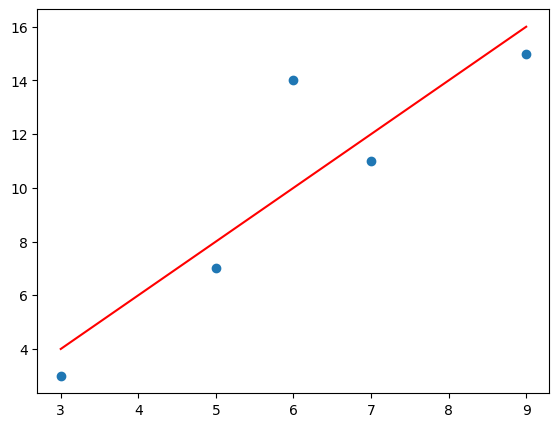

In [137]:
#Изобразим на графике исходные данные и прогнозы 
fig  = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')
#ax.scatter(x_space, Y_pred)

In [138]:
#Реализуем шаг градиентного спуска в модели парной лдинейной регрессии
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((self.predict(x)-Y)**2).mean()
    def fit(self, x, Y):
        alpha = 0.001       # динамический шаг ?
        dT_a0 = -2*sum((Y -self.predict(x)))
        dT_a1 = -2*sum((Y -self.predict(x))*x)
        self.a0 -= alpha*dT_a0
        self.a1 -= alpha*dT_a1

In [139]:
#Получим прогнозы до градиентного спуска с начальными значениями параметров
regr = SimpleRegression()
print(regr.predict(3))
print(regr.predict(5))
print(regr.predict(7))
print(regr.predict(6))
print(regr.predict(9))
print(regr.MSE(x, Y))

0
0
0
0
0
120.0


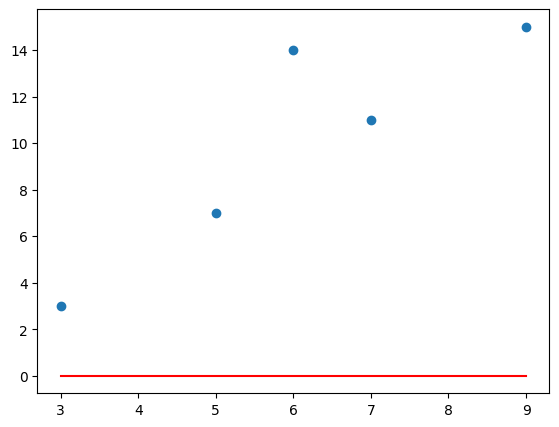

In [140]:
#Выведем прогнозы до градиентного спуска на графике
x_space = np.linspace(3, 9, 7)
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

MSE после первого шага градиентного спуска:  44.842000000000006


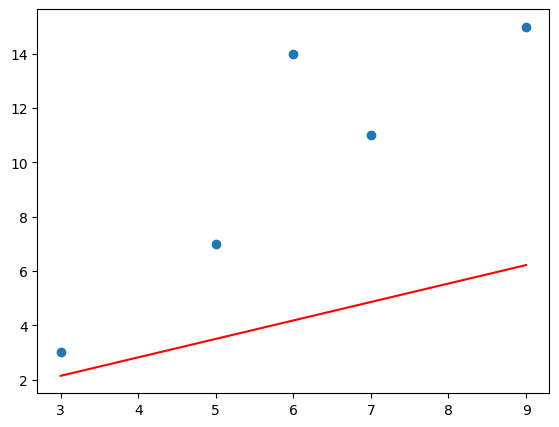

In [141]:
#Реализуем шаг градиентного спуска
regr.fit(x, Y)
print("MSE после первого шага градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

MSE после втрого шага градиентного спуска:  18.592056039999992


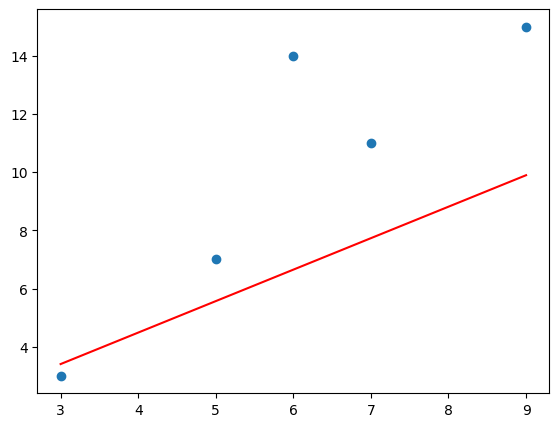

In [142]:
regr.fit(x, Y)
print("MSE после втрого шага градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')


In [143]:
#Реализуем цикл градиентного спуска
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((Y - self.predict(x))**2).mean()
    def MAE(self, x, Y):
        return abs(Y - self.predict(x)).mean()
    def MAPE(self, x, Y):
        return abs((Y - self.predict(x))/Y).mean()
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dT_a0 = -2*sum((Y -self.predict(x)))
            dT_a1 = -2*sum((Y -self.predict(x))*x)
            self.a0 -= alpha*dT_a0
            self.a1 -= alpha*dT_a1
            new_error = self.MSE(x, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < epsylon:
                break
        return steps, errors

In [144]:
#Запустим цикл градиентного спуска с заданной точностью 5
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.001, epsylon = 5)

5.004697916218
8.190462542210001
11.376227168202002
9.783344855206002
14.561991794194002
MSE после градиентного спуска:  4.709918696051655


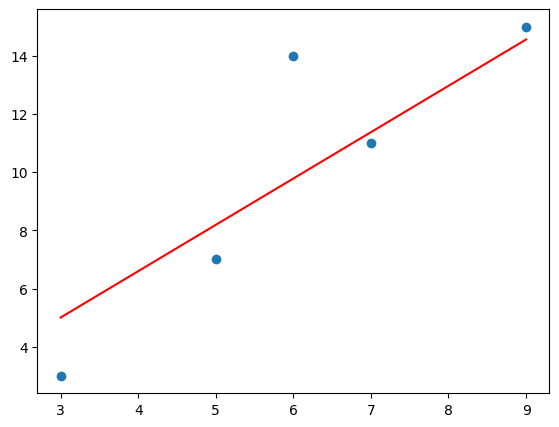

In [145]:
#Выведем график  прогнозов и вычислим MSE
print(regr.predict(3))
print(regr.predict(5))
print(regr.predict(7))
print(regr.predict(6))
print(regr.predict(9))
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

##Сравнение полученного резултьтата с формулой расчета коэфициентов

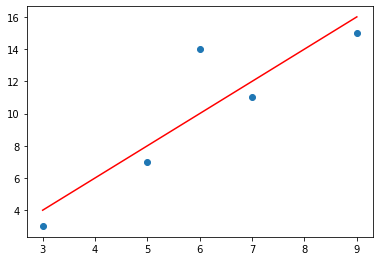

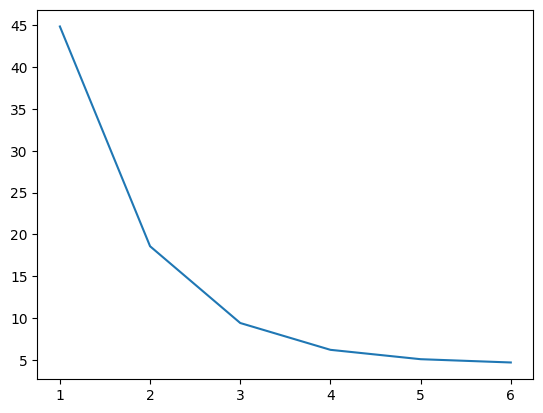

In [146]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

In [147]:
#Запустим цикл градиентного спуска с заданной точностью 0.05
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.001, epsylon = 0.05)

MSE после градиентного спуска:  4.000028517306817


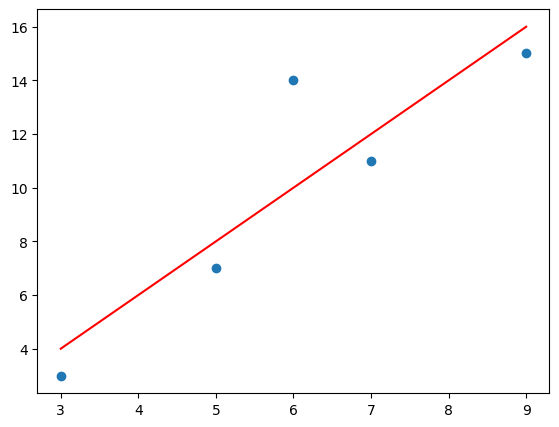

In [148]:
#Выведем график прогнозов и вычислим MSE
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

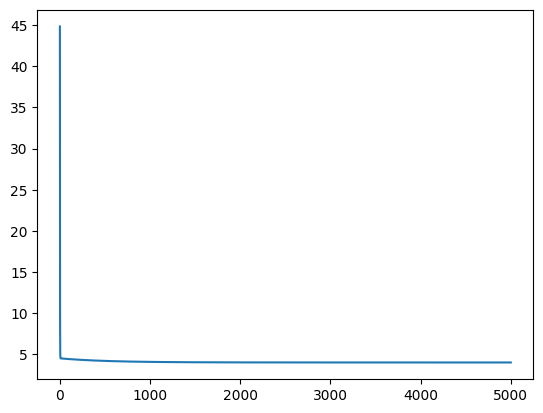

In [149]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

MSE после градиентного спуска:  4.1903709155046345


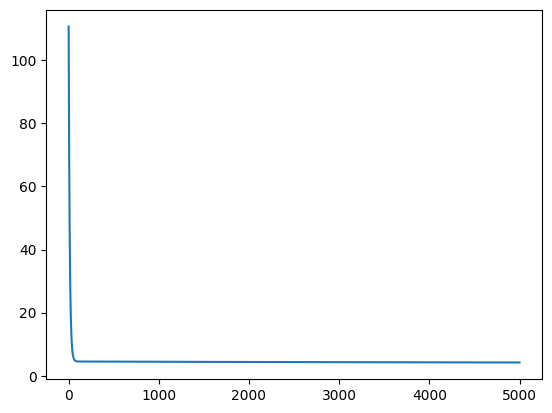

In [150]:
#Запустим цикл градиентного спуска с разными значениями скорости обучения alpha=0.0001, 0.01, 0.1, 1, 10, ..., 
#с различной допукстимой точностью epsylon = 0.001, 0.5, 5, с различным максимальным количеством шагов max_steps
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.0001, epsylon = 0.01, max_steps = 5000)
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
plt.figure()
plt.plot(steps, errors)

Загрузите файл Video Games.csv (с помощью pd.read_csv). 

Для 11 703 компьютерных игр известны платформа, год выхода, жанр, издатель, объемы продаж игры - отдельно для Северной Америки, Европы, Японии и других регионов.

В обучающей выборке для каждой игры известны следующие поля:

Name — название игры;
Platform — платформа (PC; DS; GBA; PS; PS2; PS3; PSP; Wii; XB или X360);

Year_of_Release — год выпуска;

Genre — жанр (Action; Adventure; Fighting; Platform; Puzzle; Racing; Role-Playing; Shooter; Simulation; Sports или Strategy; Misc означает все остальные жанры);

Publisher — издатель;

NA_Sales — объемы продаж игры в Северной Америке (в млн долл. США);

EU_Sales — объемы продаж игры в Европе(в млн долл. США);

Other_Sales — объемы продаж игры в других регионах (в млн долл. США);

Critic_Score — сумма оценок, данных игре штатными критиками сайта Metacritic;

Critic_Count — количество штатных критиков, давших оценки игре;

User_Score — сумма оценок, данных игре игры пользователями сайта Metacritic;

User_Count — количество пользователей, давших оценки;

Developer — разработчик;

Rating — рейтинг игры (AO — только для взрослых; 18+ M — только для лиц старше 18 лет; 17+ — только для лиц старше 17 лет; E10+ — для всех старше 10 лет; E — для всех; EC — для детей младшего возраста; RP — рейтинг не присвоен);

JP_Sales — объемы продаж игры в Японии (в млн долл. США).

Требуется построить модель, предсказывающую объем продаж игры в Японии. 

Япония - достаточно специфичная страна с точки зрения индустрии развлечений. К тому же государство активно защищает своих производителей, что не способствует импорту. Перед издателями компьютерных игр всегда стоит вопрос: стоит ли игру переводить, подгонять под местный менталитет и платить для входа на японский рынок. Чтобы это понять, следует оценить, на какой кусок пирога можно вообще в Японии рассчитывать. Один из вариантов это сделать – по истории продаж в других регионах. Если игра еще в разработке, за историю продаж можно считать прогнозы: Европа и Америка не такие непредсказуемые рынки, как Япония.

Выберите в качестве результативного признака JP_Sales. В качестве факторных признаков выберите все числовые признаки. Также можно для категориальных признаков (Platform, Genre, возможно, Publisher) ввести индикаторы (с помощью sklearn.preprocessing.OneHotEncoder).

На основе класса SimpleRegression (в котором x - это одномерный массив значений факторного признака) создайте класс MultipleRegression, который реализует градиентный спуск для случая, когда x является двумерным массивом, содержащим в каждой строке (для кафдой компьютерной игры) значения нескольких факторных признаков.

Обучите модель с помощью метода MultipleRegressionюfit, дайте прогнозы JP_Sales^ для каждой игры с помощью MultipleRegression.predict, вычислите ошибки MAE и MAPE.

In [151]:
videogames = pd.read_csv(r"Video Games.csv")
Y = videogames['jp_sales']
videogames.head()

# x = videogames.drop(['id', 'year'], axis=1)
# Y.head()
# Y.info()
# x.head()

,id,platform,year,genre,publisher,na_sales,eu_sales,other_sales,jp_sales
0,2830,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.25,1.01
1,3865,SNES,1996,Role-Playing,ASCII Entertainment,0.00,0.00,0.00,1.31
2,4617,PSP,2009,Sports,Takara Tomy,0.09,0.00,0.01,1.04
3,3675,DS,2007,Fighting,Takara Tomy,0.00,0.00,0.00,1.08
4,1612,PSV,2016,Action,Namco Bandai Games,0.00,0.00,0.00,1.12


In [152]:
from numpy.typing import NDArray
class MultiRegression(object):

    def __init__(self, num_factors: int):
        self.num_factors = num_factors           # кол-во факторных признаков
        self.a = np.zeros(num_factors + 1)       # ветктор коэффициентов функции модели
        self.dJ_da = np.zeros(num_factors + 1)   # вектор частных производных функционала

    def predict(self, x: NDArray) -> NDArray:
        """Предсказать массив значений функции модели.
        
        :param x: матрица m x n, где m - кол-во векторов c набором из n факторных признаков;
        :return: возвращаем одномерный массив предсказанных значений функции модели.
        """
        return self.a[0] + x @ self.a[1:]
    
    def MSE(self, x: NDArray, Y):
        return ((Y - self.predict(x))**2).mean()
    
    def MAE(self, x, Y):
        return abs(Y - self.predict(x)).mean()
    
    def MAPE(self, x, Y):
        return abs((Y - self.predict(x))/Y).mean()
    
    def fit(
        self, 
        x: NDArray | pd.Series, 
        Y: NDArray | pd.Series, 
        alpha: float = 0.001, 
        epsylon: float = 0.01, 
        max_steps: int = 2500
    ):
        x = np.array(x)
        Y = np.array(Y)
        
        steps, errors = [], []
        step = 0

        for _ in range(max_steps):
            predict_Y = self.predict(x)

            self.dJ_da[0] = -2*sum((Y - predict_Y))  # частная производная функционала по параметру a0
            for idx in range(self.num_factors):      # частные производные функционала по параметрам a1-an
                self.dJ_da[1 + idx] = -2*sum((Y - predict_Y) * x[:, idx])

            self.a -= alpha*self.dJ_da
            
            new_error = self.MSE(x, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < epsylon:
                break
        return steps, errors

In [153]:

x = videogames[['na_sales',	'eu_sales',	'other_sales', 'year']]
x['year'] = x['year'] * 1e-4
x.head()

C:\Temp\ipykernel_10020\1201945507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['year'] = x['year'] * 1e-4


,na_sales,eu_sales,other_sales,year
0,0.38,0.52,0.25,0.2012
1,0.00,0.00,0.00,0.1996
2,0.09,0.00,0.01,0.2009
3,0.00,0.00,0.00,0.2007
4,0.00,0.00,0.00,0.2016


In [154]:
eps_for_two_regr = 0.17

In [155]:
multi_regr = MultiRegression(num_factors=4)
steps, errors = multi_regr.fit(x, Y, alpha=1e-5, epsylon=eps_for_two_regr, max_steps = 1000)

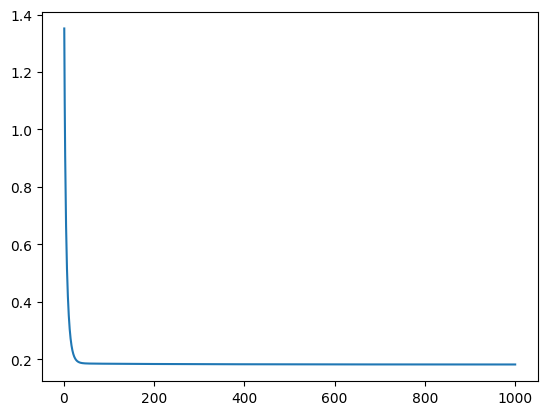

In [156]:
plt.figure()
plt.plot(steps, errors)

In [157]:
final_arr = errors[-1]


In [178]:
x2 = x[['na_sales',	'eu_sales',	'other_sales']]
x2.head()


,na_sales,eu_sales,other_sales
0,0.38,0.52,0.25
1,0.00,0.00,0.00
2,0.09,0.00,0.01
3,0.00,0.00,0.00
4,0.00,0.00,0.00


In [179]:
multi_regr2 = MultiRegression(num_factors=3)
steps, errors = multi_regr2.fit(x2, Y, alpha=1e-5, epsylon=eps_for_two_regr, max_steps = 1000)
final_err_without_year_factor = errors[-1]

In [180]:
errors_diff_percents = 100 * (final_arr - final_err_without_year_factor) /  final_arr
print(f'Разность ошибок двух моделей с 4 и 3 факторными признаками:\n{errors_diff_percents} %')

Разность ошибок двух моделей с 4 и 3 факторными признаками:
0.01847900856685024 %


### Выводы: 

* Год практически не влияет на точность предсказаний !
* Точность можно поробовать увеличить следующим образом: когда ошибка начинает стремится асиптотически, возможно, что мы находимся на дней овражного функционала и возможно стоит увеличивать шаг по счётчику итераций !

# Нормирование признаков

* нормализовать вручную - достаточно не удобно 
* вычислить среднее значение по однотипным факторным признакам и использовать его для нормализации факторных признаков других типов - (год, названия фирм  и т.д.)

Зададим следующие величины:

* not_normed_mean (nnm) - среднее значение ненормированного 1-мерного массива
* target_mean (tm) - целевое срднее значение этого массива
* norm_coef - коэффицент нормы, на который мы домножаем все элементы нормируемого массива

Получим, что 

nnm * norm_coef = target_mean - > norm_coef = target_mean / nnm

In [160]:
def mean_from_df(df: pd.DataFrame) -> float:
    
    means = df.mean()
    return sum(means) / len(means)

def norm_by_target(target_mean: float, not_normed_1d_arr: pd.Series):
    not_normed_mean = not_normed_1d_arr.mean()
    norm_coef = target_mean / not_normed_mean
    return not_normed_1d_arr * norm_coef

In [161]:
x2.head()

,na_sales,eu_sales,other_sales
0,0.38,0.52,0.25
1,0.00,0.00,0.00
2,0.09,0.00,0.01
3,0.00,0.00,0.00
4,0.00,0.00,0.00


In [162]:
mean_from_similar_df_cols = mean_from_df(x2)
mean_from_similar_df_cols


0.22571003601064663

In [163]:
not_normed_df = videogames[['na_sales',	'eu_sales',	'other_sales', 'year']]
not_normed_df.head()

,na_sales,eu_sales,other_sales,year
0,0.38,0.52,0.25,2012
1,0.00,0.00,0.00,1996
2,0.09,0.00,0.01,2009
3,0.00,0.00,0.00,2007
4,0.00,0.00,0.00,2016


In [164]:

mean_from_diff_df_cols = mean_from_df(not_normed_df)
mean_from_diff_df_cols


501.813364255519

Проверим работу нормировщика

In [165]:
target_mean = mean_from_df(not_normed_df[['na_sales',	'eu_sales',	'other_sales']])
print(f'Mean from ["na_sales",	"eu_sales",	"other_sales"] colls is {target_mean}')

normed_df = not_normed_df.copy()
normed_df['year'] = norm_by_target(target_mean=target_mean, not_normed_1d_arr=normed_df['year'] )
final_mean = mean_from_df(normed_df)
print(f'Mean from ["na_sales",	"eu_sales",	"other_sales", "(normed) year"] colls is {final_mean}')

normed_df.head()

Mean from ["na_sales",	"eu_sales",	"other_sales"] colls is 0.22571003601064663
Mean from ["na_sales",	"eu_sales",	"other_sales", "(normed) year"] colls is 0.22571003601064663


,na_sales,eu_sales,other_sales,year
0,0.38,0.52,0.25,0.226320
1,0.00,0.00,0.00,0.224520
2,0.09,0.00,0.01,0.225983
3,0.00,0.00,0.00,0.225758
4,0.00,0.00,0.00,0.226770


# Конвертация строковых признаков в числовые 

Варианты конвертеров

* OneHotEncoder
* label encoder

In [166]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
encoded_dataset = videogames.copy()

label_encoder.fit(encoded_dataset['platform'].unique())
encoded_dataset['platform'] = label_encoder.transform(encoded_dataset['platform'])

label_encoder.fit(encoded_dataset['genre'].unique())
encoded_dataset['genre'] = label_encoder.transform(encoded_dataset['genre'])

label_encoder.fit(encoded_dataset['publisher'].unique())
encoded_dataset['publisher'] = label_encoder.transform(encoded_dataset['publisher'])

encoded_dataset.head()


,id,platform,year,genre,publisher,na_sales,eu_sales,other_sales,jp_sales
0,2830,19,2012,6,63,0.38,0.52,0.25,1.01
1,3865,22,1996,7,4,0.00,0.00,0.00,1.31
2,4617,18,2009,10,235,0.09,0.00,0.01,1.04
3,3675,3,2007,2,235,0.00,0.00,0.00,1.08
4,1612,19,2016,0,162,0.00,0.00,0.00,1.12


In [167]:
mean_sales = mean_from_df(encoded_dataset[['na_sales', 'eu_sales', 'other_sales']])

need_to_normed_columns = ['platform', 'year', 'genre', 'publisher']
for coumn_name in need_to_normed_columns:
    encoded_dataset[coumn_name] = norm_by_target(
        target_mean=mean_sales, 
        not_normed_1d_arr=encoded_dataset[coumn_name],
    )
encoded_dataset.head()


,id,platform,year,genre,publisher,na_sales,eu_sales,other_sales,jp_sales
0,2830,0.302430,0.226320,0.294732,0.099304,0.38,0.52,0.25,1.01
1,3865,0.350182,0.224520,0.343855,0.006305,0.00,0.00,0.00,1.31
2,4617,0.286512,0.225983,0.491221,0.370420,0.09,0.00,0.01,1.04
3,3675,0.047752,0.225758,0.098244,0.370420,0.00,0.00,0.00,1.08
4,1612,0.302430,0.226770,0.000000,0.255353,0.00,0.00,0.00,1.12


# Используем максимальное количество признаков

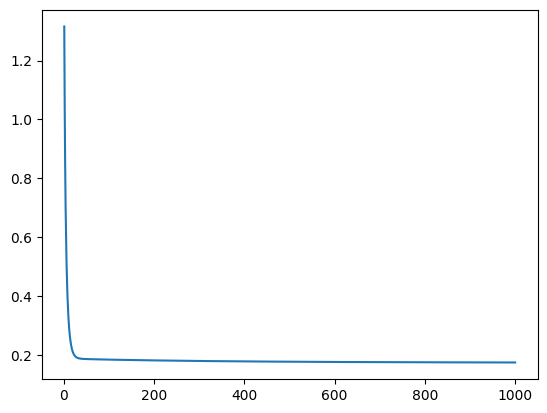

In [170]:
factors = [
    'platform',	
    'year',	
    'genre',	
    'publisher',	
    'na_sales',	
    'eu_sales',	
    'other_sales',
]
x = encoded_dataset[factors]
multi_regr_all_factors = MultiRegression(num_factors=len(factors))
steps, errors = multi_regr_all_factors.fit(x, Y, alpha=1e-5, epsylon=eps_for_two_regr, max_steps = 1000)
final_err_all_factors = errors[-1]
plt.figure()
plt.plot(steps, errors)

In [181]:
final_err_all_factors

0.17538628411628915

In [182]:
final_err_without_year_factor

0.18187000806881806

In [183]:
final_arr

0.18190362205472096

# Вывод

Минимальную ошибку предсказаний 0.17538 мы получили при использовании всех факторных признаков

# Расширение факторных признаков
Попробуем расширить набор факторных признаков, добавив логарифмы, квадраты, кубы

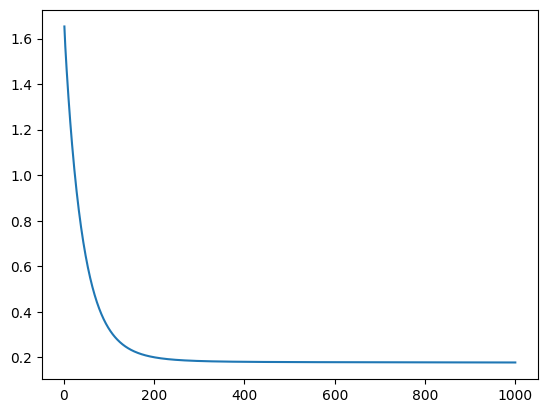

In [201]:
extended_dataset = encoded_dataset.copy()
# extended_dataset['cube_na_sales'] = extended_dataset['na_sales'] ** 2
# extended_dataset['cube_eu_sales'] = extended_dataset['eu_sales'] ** 2
# extended_dataset['cube_other_sales'] = extended_dataset['other_sales'] ** 2

extended_dataset['cube_na_sales'] = norm_by_target(mean_sales, extended_dataset['na_sales'] ** 2)
extended_dataset['cube_eu_sales'] = norm_by_target(mean_sales, extended_dataset['eu_sales'] ** 2)
extended_dataset['cube_other_sales'] = norm_by_target(mean_sales, extended_dataset['other_sales'] ** 2)

reg_factors = extended_dataset.columns.drop(['id', 'jp_sales'])
x = extended_dataset[reg_factors]
x.head()

multi_regr_all_factors = MultiRegression(num_factors=len(reg_factors))
steps, errors = multi_regr_all_factors.fit(x, Y, alpha=1e-6, epsylon=eps_for_two_regr, max_steps = 1000)
final_err_extended = errors[-1]
plt.figure()
plt.plot(steps, errors)

In [202]:
final_err_extended


0.17724886587254984

In [203]:
final_err_extended > final_err_all_factors

True

# Вывод 

Кажется плодить факторные признаки на основе существующих -  плохая идея, что довольно логично !